# Setup

In [1]:
## import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Read data csv file
loan_df = pd.read_csv("loan.csv")

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Understanding Data




In [4]:
loan_df.shape

(39717, 111)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


We observed that there are a lot of columns with all null values.

*   id
*   member_id
*   loan_amnt
ETC,





In [7]:
## Removing Columns with null values
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [8]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0



There are several columns which can not contribute in our case study analysis in any way so remove it which has single value

In [9]:
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


# Data Cleaning and Manipulation

* We are analyzing the user details and the driving factors of loan defaulting before approving loan.
* Removing column which is not contributing in our analysis like
"funded_amnt"
* Ther are some fields like "out_prncp_inv" , "total_pymnt_inv " useful for other but not contributing to the loan defaulting analysis.
* description ("desc") which we cannot do anythhing about for now.
* There are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". doesnt contribute to the loan defaulting in any way due to irrelevant information,remove them




#### Post-approval features
    delinq_2yrs
    revol_bal
    out_prncp
    total_pymnt
    last_pymnt_d
    last_pymnt_amnt
    next_pymnt_d
    chargeoff_within_12_mths
    total_rec_prncp
    total_rec_int
    total_rec_late_fee
    recoveries
    collection_recovery_fee



In [10]:
loan_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [11]:
loan_df.shape

(39717, 21)

In [12]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

# Data analysis
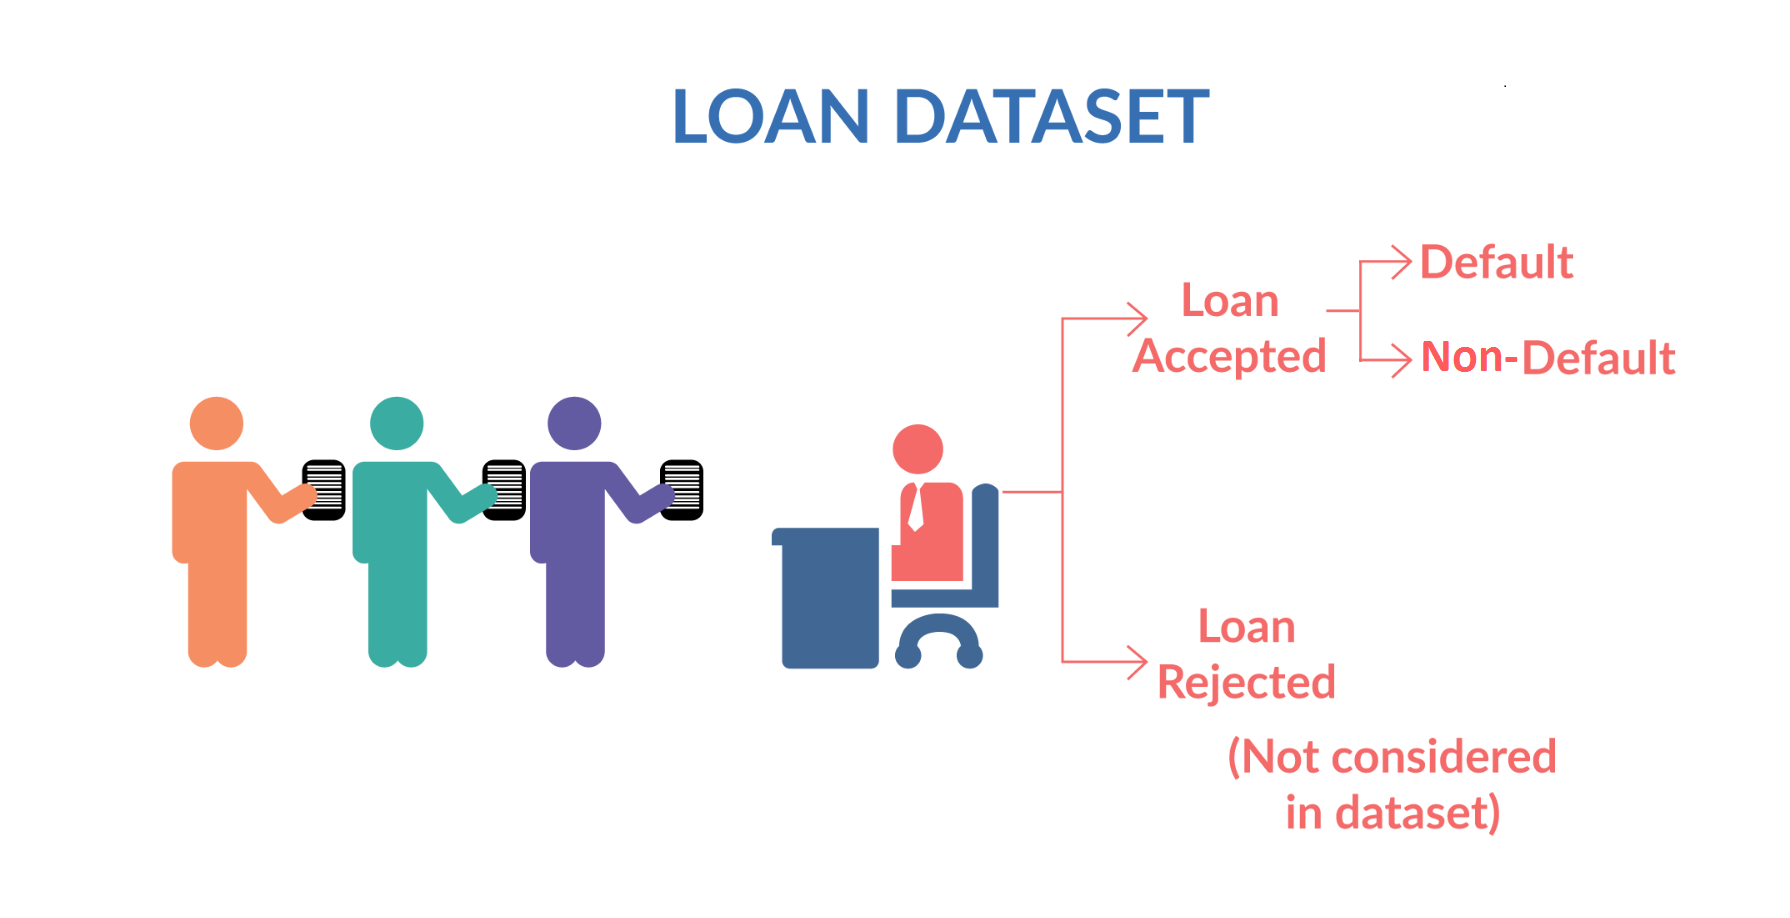

The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.


> 
    * We cannot make anything up for the current loans.
    * To exclude that data , removing the records with current loan status




In [15]:
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Seeing for missing values if any.

In [16]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

columns with missing values are "emp_length", "revol_util".

In [18]:
loan_df.info() ## see what kind of data each column has

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [19]:
print("Mode : " + loan_df.emp_length.mode()[0])
loan_df.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64


The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.

    This means that we can safely assign the value of mode to the null values in the column.
    Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.



In [20]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()

0

In [22]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isna().sum()

0


Standardizing the data

    "revol_util" column although described as an object column, it has continous values.
    So we need to standardize the data in this column
    "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
    "int_rate" is one such column.
    Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable


In [34]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12



####Outlier Treatment

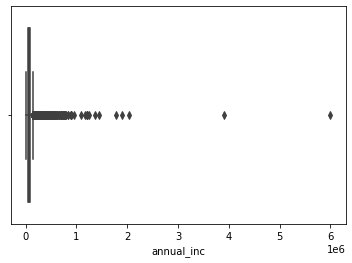

In [35]:
sns.boxplot(loan_df['annual_inc'])


Clearly indincating the presence of outliers.

    So, Removing them.
    Let's see the quantile info and take an appropriate action.
    The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
    So, considering threshold for removing outliers as 0.95



In [38]:
quantile_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info    


0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [40]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_data = loan_df[loan_df.annual_inc <= per_95_annual_inc]

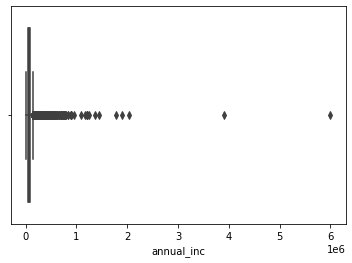

In [41]:
sns.boxplot(loan_df.annual_inc)


Now the "annual_inc" data looks good and proceeding next.

    Let's analyze other numerical variables which could possibly have outliers.
    dti
    loan_amnt
    funded_amnt_inv



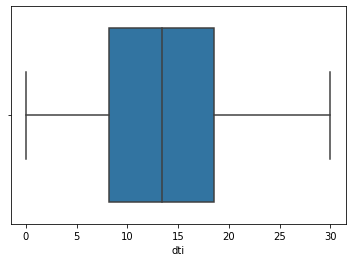

In [42]:
sns.boxplot(loan_df.dti)

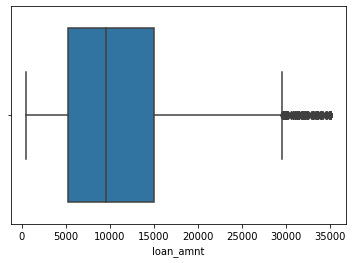

In [44]:
sns.boxplot(loan_df.loan_amnt)

In [45]:
loan_df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

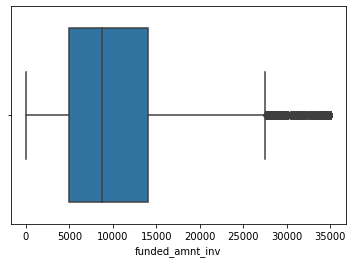

In [46]:
sns.boxplot(loan_df.funded_amnt_inv)

In [47]:
loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8750.000000
0.750    14000.000000
0.900    19975.000000
0.950    24506.582238
0.970    25828.061320
0.975    27975.000000
0.980    29890.414864
0.985    30000.000000
0.990    34721.583150
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns

#### Visualizing Categorical Data

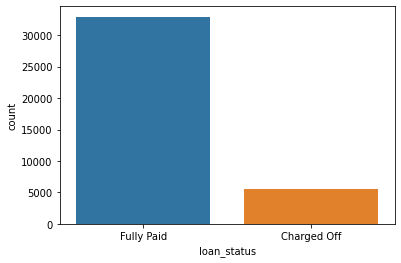

In [48]:
sns.countplot(x = 'loan_status', data = loan_df)

In [50]:
loan_df.sub_grade.head()
loan_df.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))

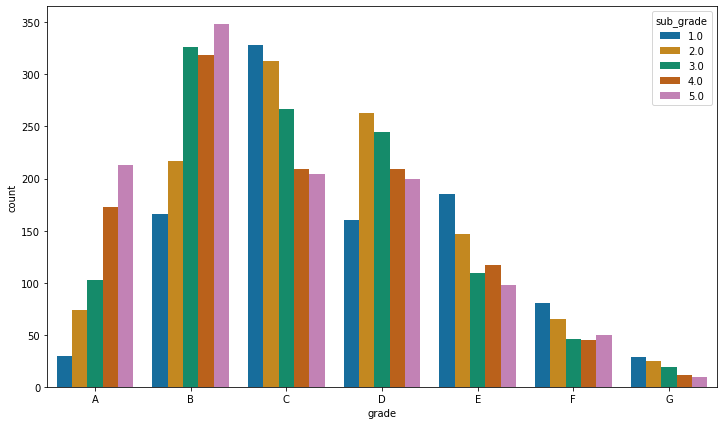

In [51]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])


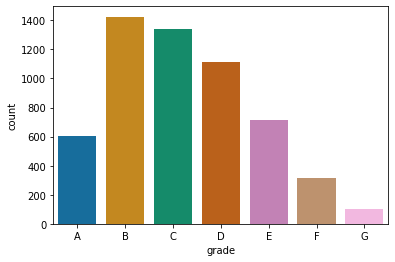

In [52]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [53]:
#Home_ownership checking unique values
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [55]:
#replacing 'NONE' with 'OTHERS'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

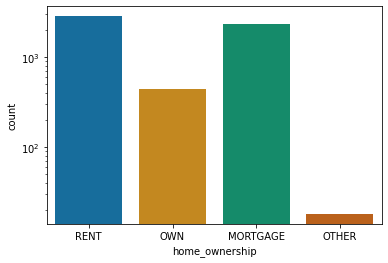

In [56]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

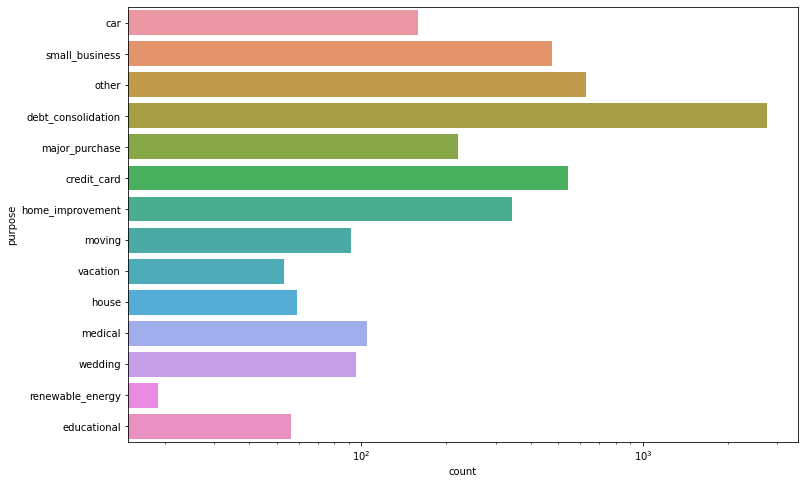

In [57]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])


Creating bins for some numerical variable to make them categorical

In [67]:
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])


In [68]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,revol_util_groups,total_acc_groups,annual_inc_groups,int_rate_groups,open_acc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2.0,10,RENT,24000.0,...,1,3,0,83.7,9,80-100,2-20,3k-31k,9%-13%,2-10
1,2500,2500.0,60 months,15.27,59.83,C,4.0,0,RENT,30000.0,...,5,3,0,9.4,4,0-20,2-20,3k-31k,13%-17%,2-10
2,2400,2400.0,36 months,15.96,84.33,C,5.0,10,RENT,12252.0,...,2,2,0,98.5,10,80-100,2-20,3k-31k,13%-17%,2-10
3,10000,10000.0,36 months,13.49,339.31,C,1.0,10,RENT,49200.0,...,1,10,0,21.0,37,20-40,20-37,3k-31k,13%-17%,2-10
5,5000,5000.0,36 months,7.90,156.46,A,4.0,3,RENT,36000.0,...,3,9,0,28.3,12,20-40,2-20,3k-31k,5%-9%,2-10



Analyzing interest rate wrt the interest rate bins created ,open_acc,revol_util,total_acc,annual_inc

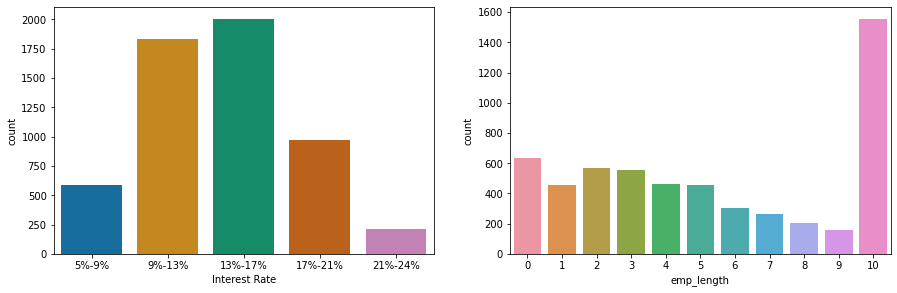

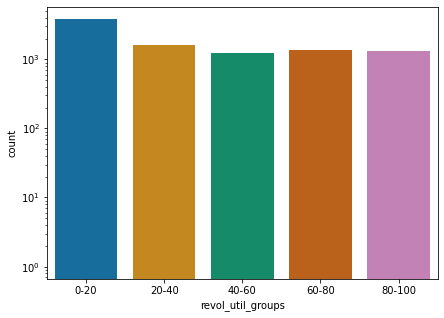

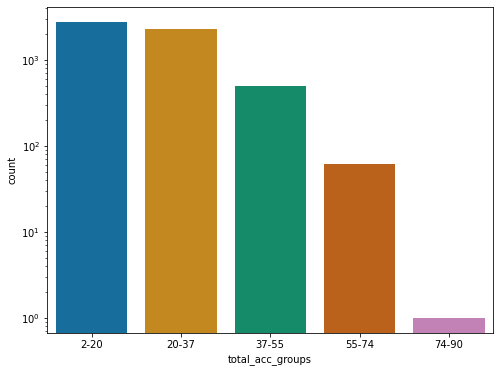

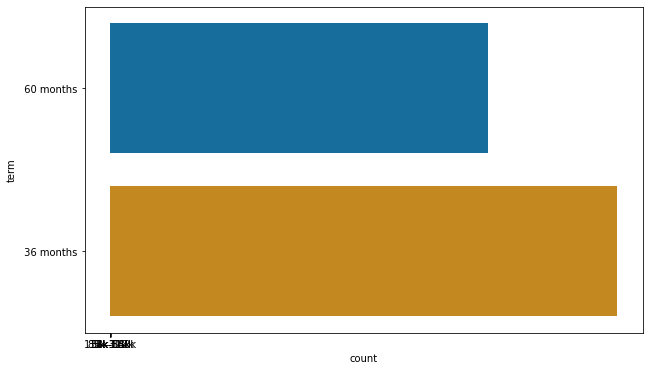

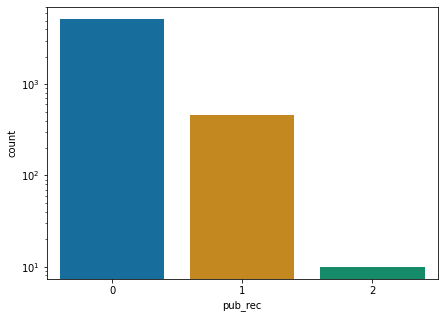

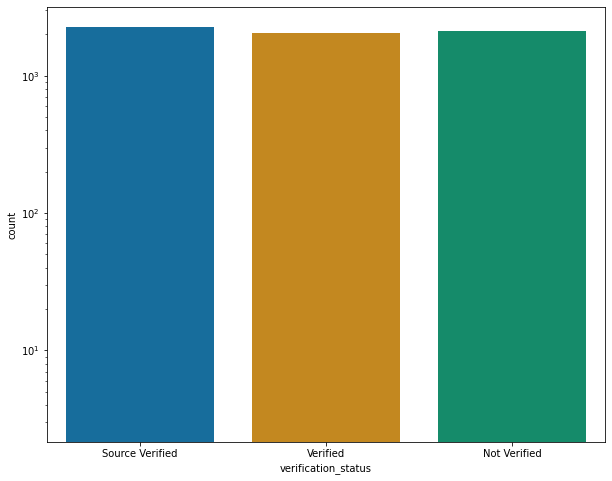

In [72]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_df[loan_df.loan_status == 'Charged Off'])


fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

sns.countplot(x='revol_util_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])



fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])




fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])





sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])




fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_df[loan_df['loan_status']=='Charged Off'])




fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])



sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])



     


     

     

     


     

     




Analyzing by issued month and year

In [73]:
## Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]    

In [74]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,revol_util_groups,total_acc_groups,annual_inc_groups,int_rate_groups,open_acc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2.0,10,RENT,24000.0,...,0,83.7,9,80-100,2-20,3k-31k,9%-13%,2-10,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4.0,0,RENT,30000.0,...,0,9.4,4,0-20,2-20,3k-31k,13%-17%,2-10,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5.0,10,RENT,12252.0,...,0,98.5,10,80-100,2-20,3k-31k,13%-17%,2-10,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1.0,10,RENT,49200.0,...,0,21.0,37,20-40,20-37,3k-31k,13%-17%,2-10,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4.0,3,RENT,36000.0,...,0,28.3,12,20-40,2-20,3k-31k,5%-9%,2-10,Dec,2011


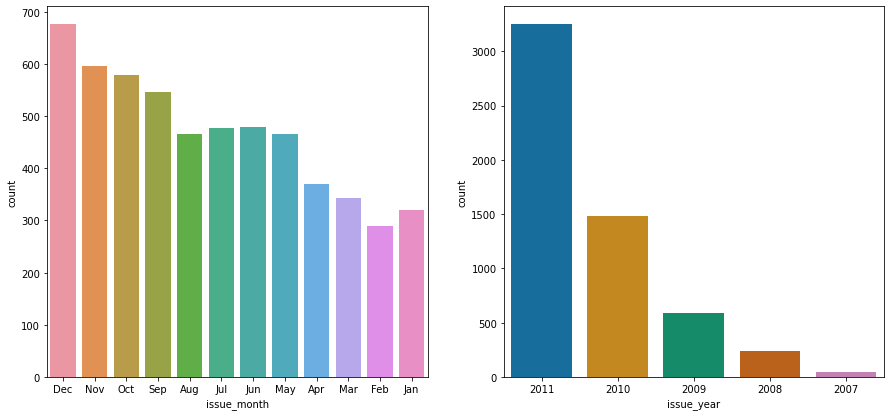

In [75]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'])


Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years


> Analyzing installment,dti, loan_amnt



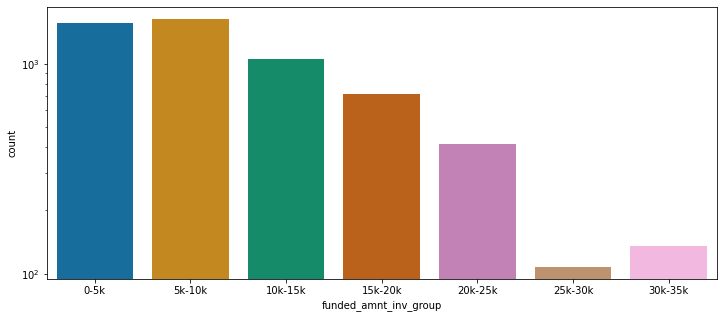

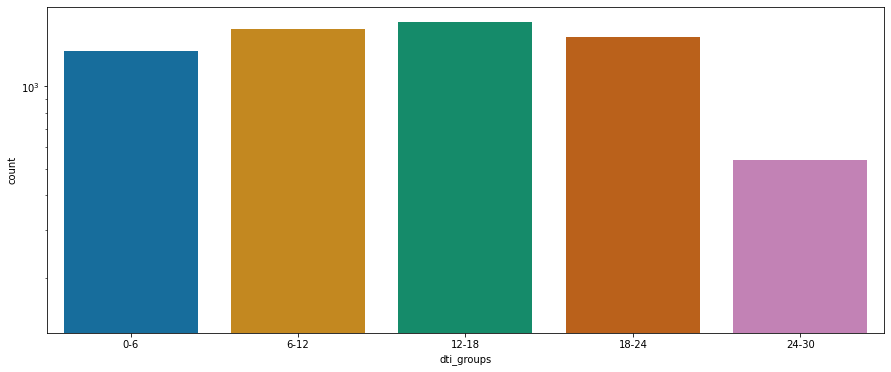

In [78]:
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_df[loan_df['loan_status']=='Charged Off'])



fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

sns.countplot(x='dti_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])


     



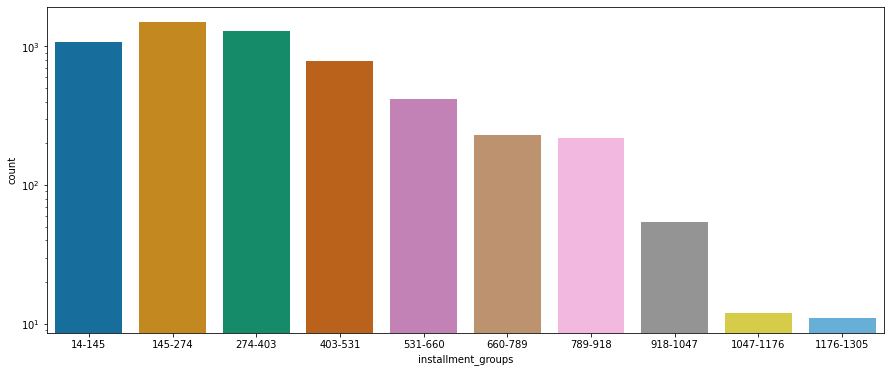

In [79]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])


# Observations

The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :

    Applicants having house_ownership as 'RENT'
    Applicants who use the loan to clear other debts
    Applicants who receive interest at the rate of 13-17%
    Applicants who have an income of range 31201 - 58402
    Applicants who have 20-37 open_acc
    Applicants with employement length of 10
    When funded amount by investor is between 5000-10000
    Loan amount is between 5429 - 10357
    Dti is between 12-18
    When monthly installments are between 145-274
    Term of 36 months
    When the loan status is Not verified
    When the no of enquiries in last 6 months is 0
    When the number of derogatory public records is 0
    When the purpose is 'debt_consolidation'
    Grade is 'B'
    And a total grade of 'B5' level.



Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting.

    The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)





Analysing annual income with other columns for more insights

#### Annual income vs loan purpose

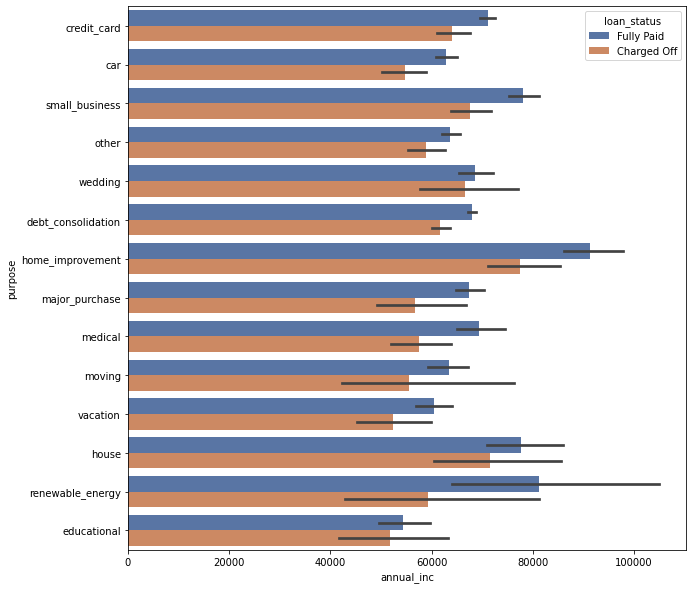

In [80]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()


Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.

    Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"



#### Annual income vs home ownership

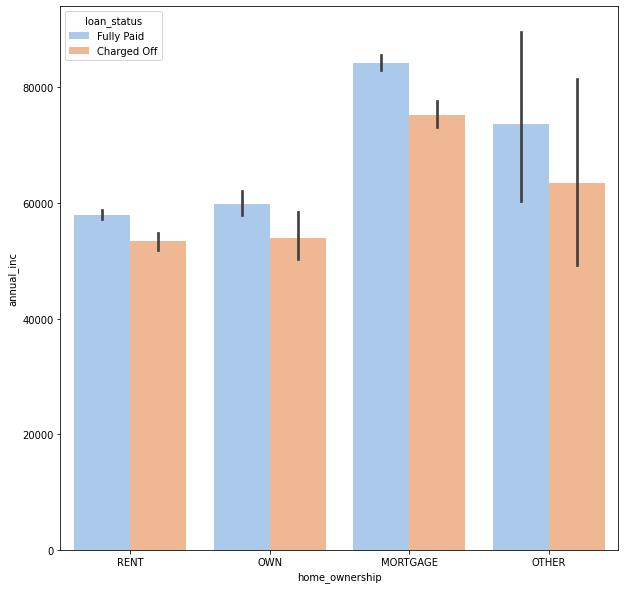

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Annual Income vs Loan amount

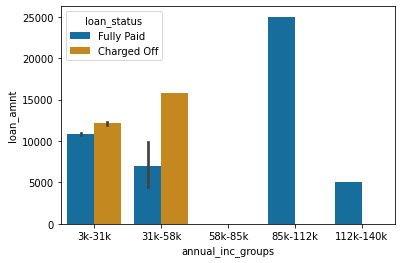

In [82]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_df)


Across all the income groups, the loan_amount is higher for people who defaulted.

#### Annual income vs int_rate

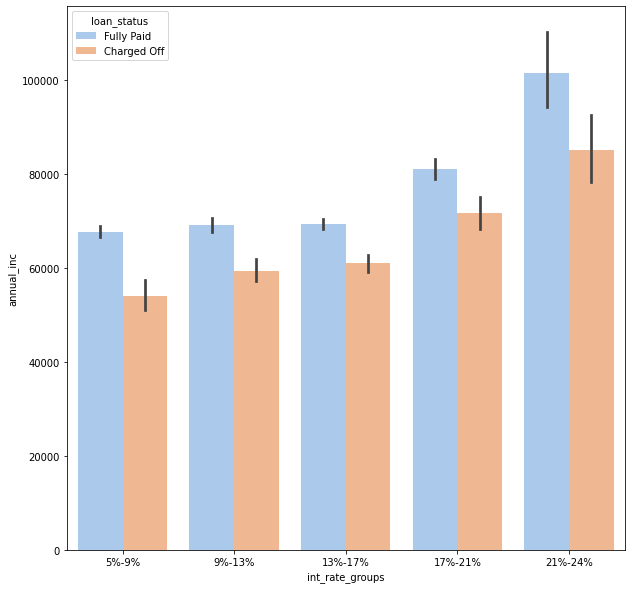

In [83]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()


Analysing loan_amount with other columns for more insights

#### Loan Amount vs Interest Rate

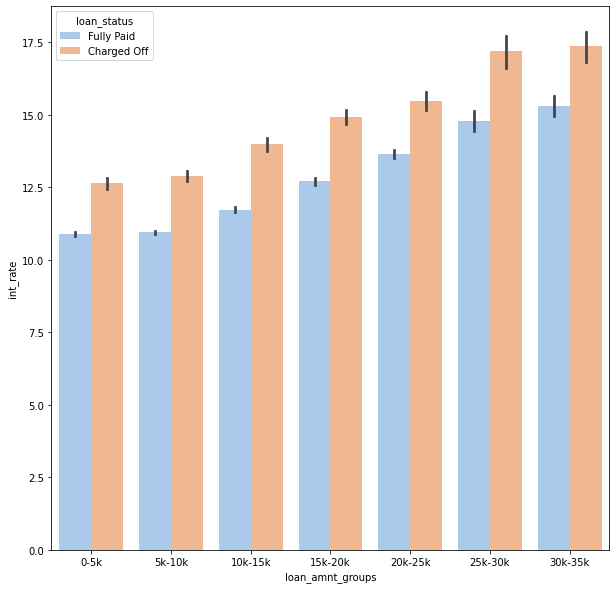

In [84]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs Loan purpose

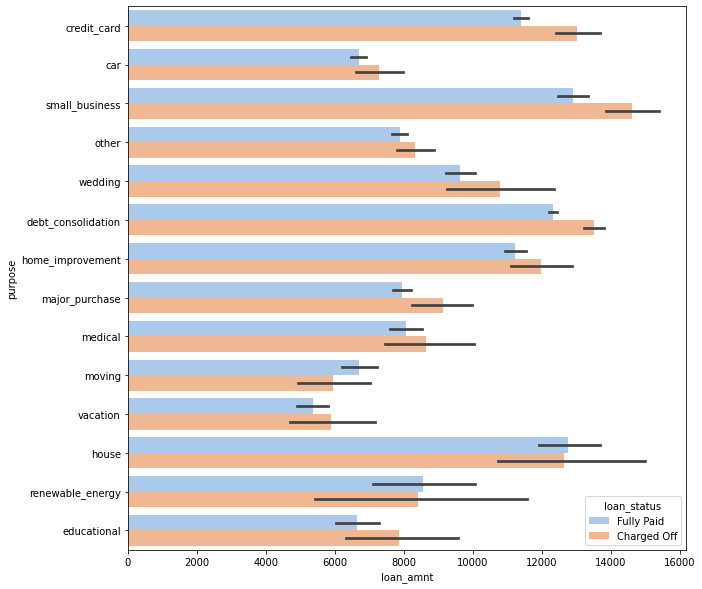

In [85]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs House Ownership

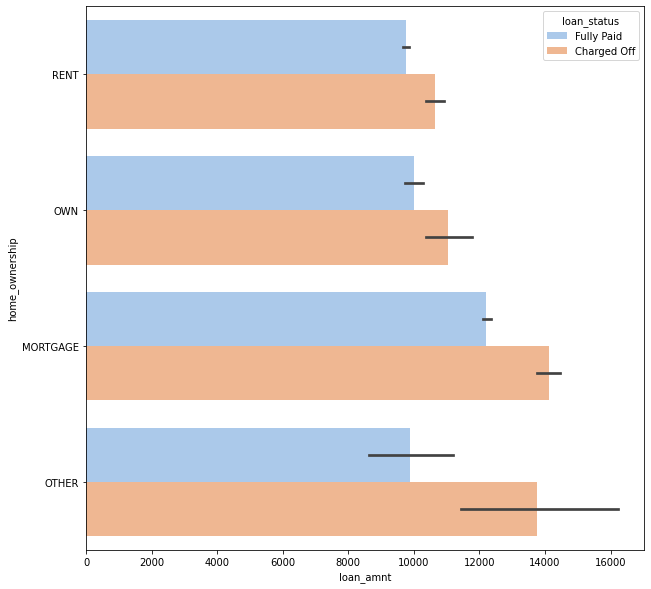

In [86]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs month issued and year issued

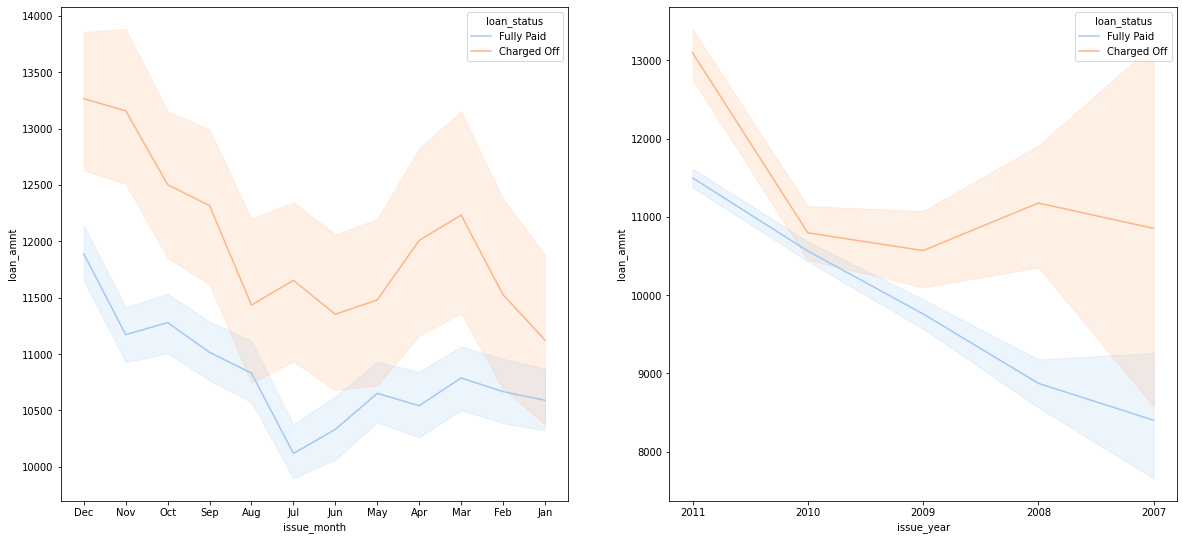

In [87]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


#### Loan amount vs Grade

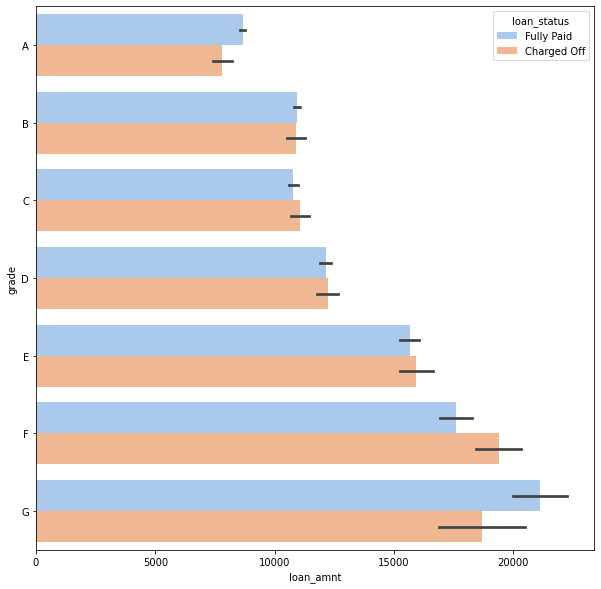

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

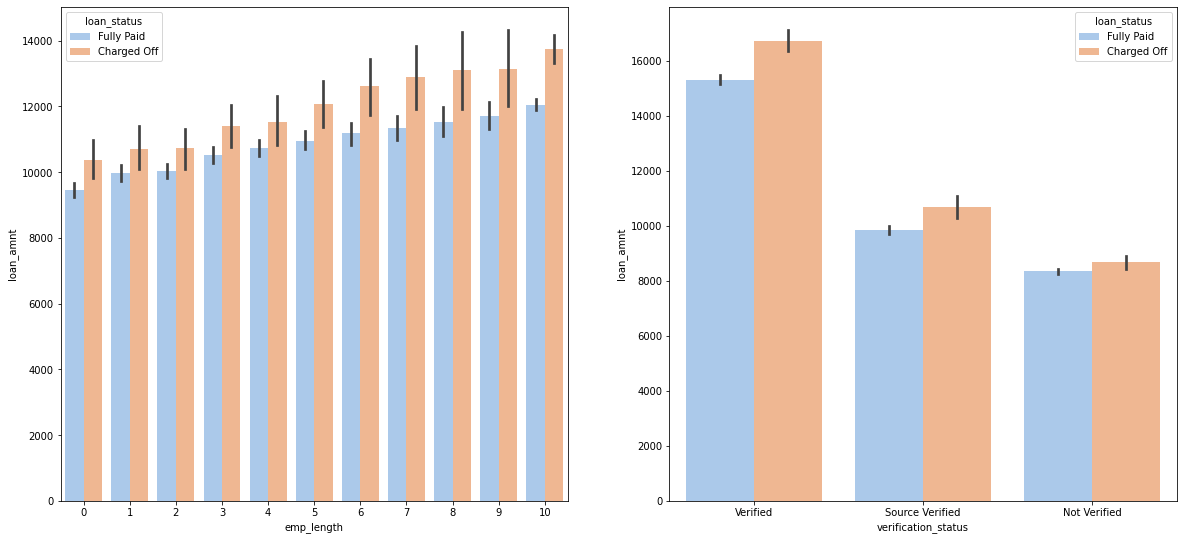

In [89]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


Employees with longer working history got the loan approved for a higher amount.

    Looking at the verification status data, 
    verified loan applications tend to have higher loan amount. 
    Which might indicate that the firms are first verifying the loans with higher values.



#### Grade vs interest rate

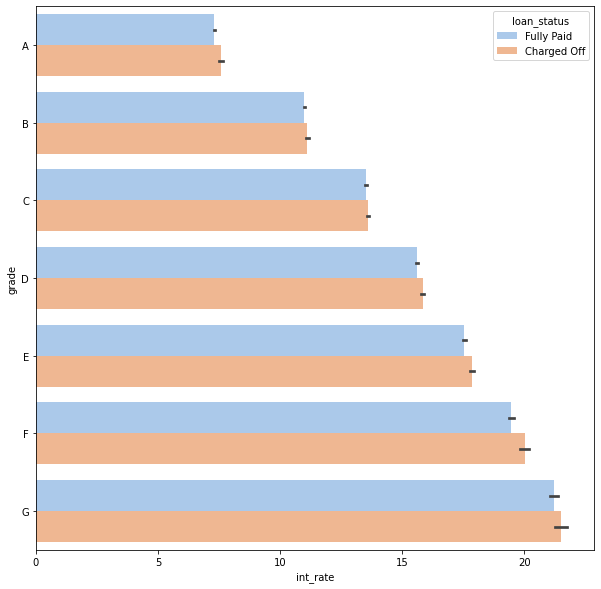

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()


The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.

    This can be a pretty strong driving factor for loan defaulting.



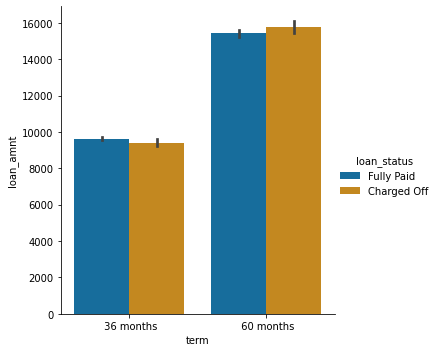

In [91]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_df,hue = 'loan_status', kind = 'bar')

# Conclusion


The above analysis with respect to the charged off loans. There is a more probability of defaulting when :

    Applicants taking loan for 'home improvement' and have income of  60k -70k
    Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
    When grade is F and loan amount is between 15k-20k
    When employment length is 10yrs and loan amount is 12k-14k
    When the loan is verified and loan amount is above 16k
    For grade G and interest rate above 20%
    Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
    Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
    Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
    Applicants who have taken a loan for small business and the loan amount is greater than 14k


